Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# BIOLOGIJA
## 6.4.2021. 

# Pavle Šarenac 2020/0359

#### __Zadatak 1__: Eksponencijalni i logistički rast
Uporediti model eksponencijalnog i logističkog porasta. Diferencijalne jednačine koje definišu ova dva procesa su:<br><br>Eksponencijalni porast:<br><br> $\frac{dx}{dt} = rx$, <br><br>Logistički porast:<br> <br>$\frac{dx}{dt} = rx(1-\frac{x}{K})$, <br><br> gde su $r$ i $K$ stopa porasta i nosivi kapacitet, respektivno, prema definicijama sa slajdova. 

a) Formirati Python skriptu (<font color='blue'>expVSlog.py</font>) koja na vremenskom domenu od 0 do 70 dana (vremensku osu napraviti kao ekvidistantnu podelu u 1000 tačaka), rešava diferencijalnu jednačinu eksponencijalnog rasta kao i jednačinu logističkog rasta. Jednačine treba rešiti za početni uslov $x(0) = 50$ jedinki, za tri slučaja stope rasta $r = 0.1, 0.2, 0.3$ jedinki na dan. U slučaju logističkog rasta, nosivi kapacitet iznosi $K = 500$ jedinki. 

Nacrtati dva grafika:

grafik 1: Reprodukovati levi grafik sa slajda br. 4 iz pripremnog fajla. Na istom grafiku prikazati:<br>
<ol>
<li>Sve tri krive (za sve tri vrednosti stope rasta $r$) koje prestavljaju rešenja diferencijalne jednačine logističkog rasta. Krive treba da budu nacrtane različitim bojama, za koje treba prikazati legendu.</li> 
<li>Dodati horizontalnu isprekidanu liniju crvene boje $x  = K$ (asimptotu kojoj teže sve tri dinamike).</li>
<li>Označiti ose. Dodati grid na grafik.</li>
</ol>

grafik 2: Reprodukovati desni grafik sa slajda br. 4 iz pripremnog fajla koji poredi eksponencijalni porast sa logističkim porastom. Na istom grafiku prikazati:
<ol>
<li>Sve tri krive (za sve tri vrednosti stope rasta $r$) koje prestavljaju rešenja diferencijalne jednačine logističkog rasta. Krive treba da budu nacrtane različitim bojama, za koje treba prikazati legendu.</li> 
<li>Sve tri krive (za sve tri vrednosti stope rasta $r$) koje predstavljaju rešenja diferencijalne jednačine eksponencijalnog rasta. Sve tri krive treba da budu nacrtane sivom bojom kao isprekidane linije.</li>
<li>Dodati horizontalnu isprekidanu liniju crvene boje $x  = K$ (asimptotu kojoj teže sve tri dinamike).</li>
<li>Označiti ose. Dodati grid na grafik.</li> 
</ol>    
Da bi grafik bio pregledan (zbog velikog porasta eksponencijalne funkcije), postaviti limit za $y$ osu grafika tako da ide od 0 do 600, pomoću naredbe <font color='blue'>plt.ylim((0,600))</font>. 

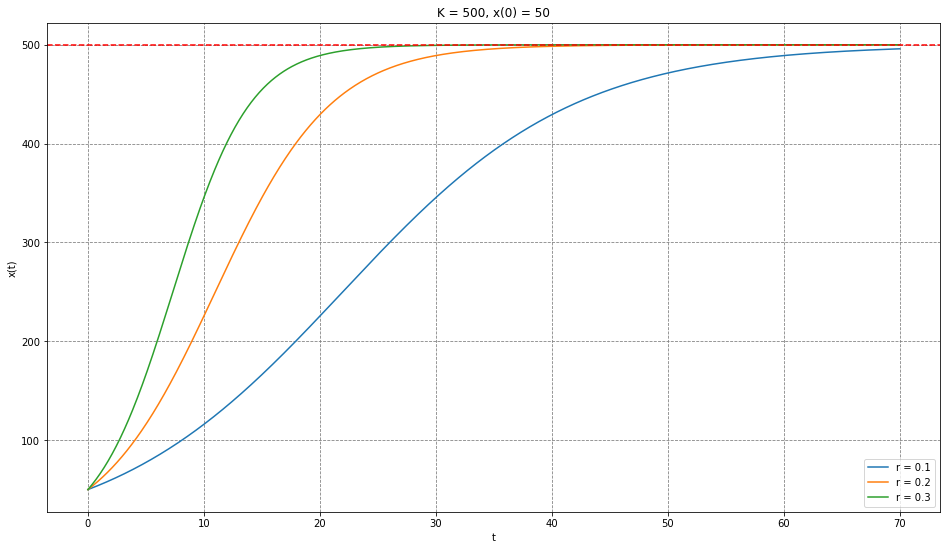

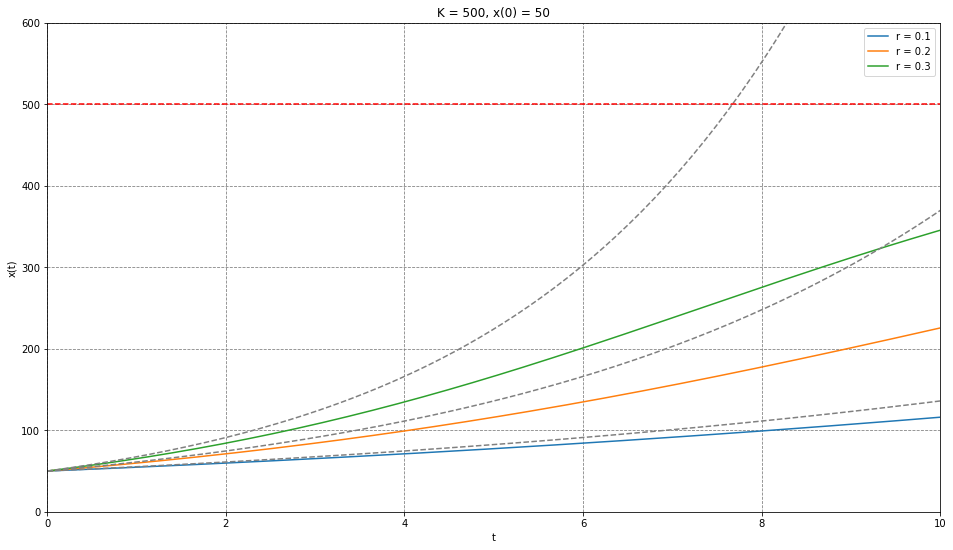

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import integrate


def exp_rast(pocetniUslov, vreme, stopaRasta):
    return stopaRasta*pocetniUslov

def log_rast(pocetniUslov, vreme, stopaRasta, kapacitet):
    return stopaRasta*pocetniUslov*(1 - pocetniUslov/kapacitet)

vreme = np.linspace(0, 70, 1000) # u danima
pocetniUslov = 50
stopaRasta = [0.1, 0.2, 0.3]
kapacitet = 500

log_sol1 = integrate.odeint(log_rast, pocetniUslov, vreme, args=(stopaRasta[0], kapacitet))
log_sol2 = integrate.odeint(log_rast, pocetniUslov, vreme, args=(stopaRasta[1], kapacitet))
log_sol3 = integrate.odeint(log_rast, pocetniUslov, vreme, args=(stopaRasta[2], kapacitet))

exp_sol1 = integrate.odeint(exp_rast, pocetniUslov, vreme, args=(stopaRasta[0], ))
exp_sol2 = integrate.odeint(exp_rast, pocetniUslov, vreme, args=(stopaRasta[1], ))
exp_sol3 = integrate.odeint(exp_rast, pocetniUslov, vreme, args=(stopaRasta[2], ))

plt.figure(figsize=(16, 9))
plt.plot(vreme, log_sol1, label="r = 0.1")
plt.plot(vreme, log_sol2, label="r = 0.2")
plt.plot(vreme, log_sol3, label="r = 0.3")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("K = 500, x(0) = 50")
plt.grid(b=True, which = "both", color="grey", linestyle="--")
plt.axhline(500, linestyle="--", color="red")
plt.legend()
plt.show()

print()

plt.figure(figsize=(16, 9))
plt.ylim(0, 600)
plt.xlim(0, 10)
plt.plot(vreme, log_sol1, label="r = 0.1")
plt.plot(vreme, log_sol2, label="r = 0.2")
plt.plot(vreme, log_sol3, label="r = 0.3")
plt.plot(vreme, exp_sol1, color="grey", linestyle="--")
plt.plot(vreme, exp_sol2, color="grey", linestyle="--")
plt.plot(vreme, exp_sol3, color="grey", linestyle="--")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("K = 500, x(0) = 50")
plt.grid(b=True, which = "both", color="grey", linestyle="--")
plt.axhline(500, linestyle="--", color="red")
plt.legend()
plt.show()

b) Zašto se eksponencijalni i logistički brže razilaze kada je stopa rasta $r$ veća? 

Ovo se događa zato što su brzine eksponencijalnog i logističkog porasta direktno srazmerne sa stopom rasta r. Naravno, vrednost funkcije eksponencijalnog rasta će više da se poveća na svom domenu za veću stopu rasta nego što će vrednost funkcije logističkog rasta zato što eksponencijalni rast ne uzima u obzir faktore koji neminovno usporavaju rast određenog entiteta, dok logistički rast predstavlja realniju sliku pojava u prirodi.

c) Napraviti novu Python skriptu (<font color='blue'>sunflower.py</font>) koja učitava fajl sunflower_data.csv i kroz eksperimentalne podatke provlači eksponencijalni i logistički model (reprodukovati grafik za slajda br. 6 u pripremnom fajlu).<br>

Skica postupka: Pomoću naredbe <font color='blue'>pd.read_csv</font> učitati fajl sunflower_data.csv. Nacrtati grafik zavisnosti kolone Height od kolone Age, pri čemu grafik treba da bude tipa scatter, sa markerima tamno crvene boje (DarkRed), veličine 10. 
Zatim, za $r = 0.1$ rešiti diferencijalne jednačine eksponencijalnog i logističkog rasta i dodati te dve krive na postojeći grafik. Uneti legendu, obeležiti ose grafika, postaviti grid, a limit za y osu postaviti da bude od 0 do 280. Vremensku osu napraviti od $tmin$ do $tmax$ u 200 tačaka. Za $tmin$ uzeti minimalni element kolone Age, za $tmax$ uzeti maksimalni element kolone Height. Za vrednost nosivog kapaciteta $K$, uzeti maksimalni element kolone Height. Za početni uslov $x(0)$ uzeti prvi element kolone Height koji odgovara prvom vremenskom trenutku za koji imamo podatke. 

    Age  Height
0     7    16.9
1    14    37.1
2    21    69.1
3    28    98.6
4    35   131.4
5    42   171.8
6    49   208.0
7    56   229.9
8    63   251.8
9    70   253.5
10   77   256.9
11   84   258.7
12   92   262.1
13   96   262.2


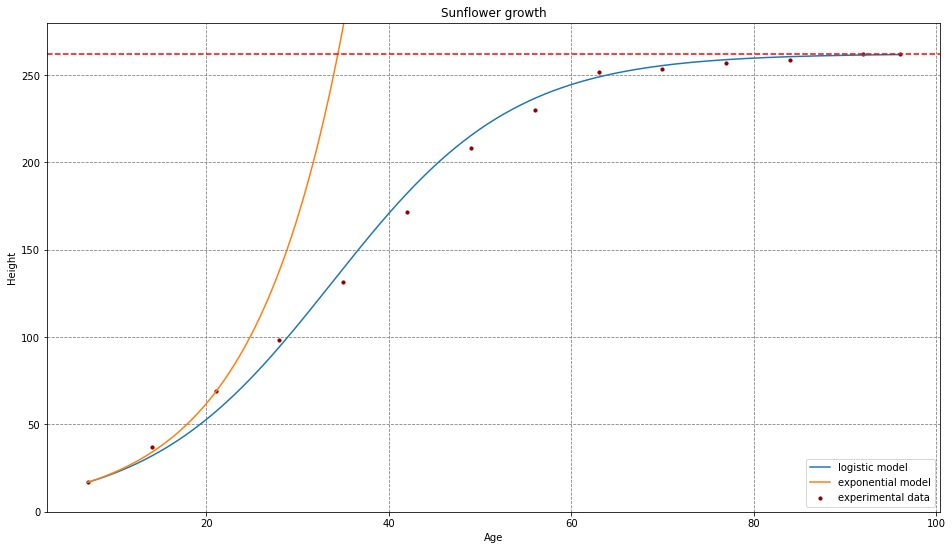

In [5]:
sunflower_data = pd.read_csv("sunflower_data.csv")
print(sunflower_data)
sunflower_data.plot(kind="scatter", x="Age", y="Height", s=10, figsize=(16, 9), color="DarkRed", label="experimental data")
plt.ylim(0, 280)
pocetno_vreme = min(sunflower_data.Age)
krajnje_vreme = max(sunflower_data.Age)
vreme = np.linspace(pocetno_vreme, krajnje_vreme, 200)
pocetniUslov = sunflower_data.Height[0]
kapacitet = max(sunflower_data.Height)
log_sol1 = integrate.odeint(log_rast, pocetniUslov, vreme, args=(stopaRasta[0], kapacitet))
exp_sol1 = integrate.odeint(exp_rast, pocetniUslov, vreme, args=(stopaRasta[0], ))
plt.plot(vreme, log_sol1, label="logistic model")
plt.plot(vreme, exp_sol1, label="exponential model")
plt.grid(b=True, which = "both", color="grey", linestyle="--")
plt.title("Sunflower growth")
plt.axhline(kapacitet, linestyle="--", color="red")
plt.legend()
plt.show()

d) Sa grafika oceniti vremenski trenutak do koga eksponencijalni model dovoljno dobro prati eksperimentalne podatke.

Eksponencijalni model dovoljno dobro prati eksperimentalne podatke do otprilike 20 godina od početka merenja.

#### __Zadatak 2__: Lotka-Volterra model

a) U okviru nove Python skripte (lv_model.py) formirati Python funkciju koja predstavlja sistem diferencijalih jednačina koje odgovaraju Lotka-Volterra modelu bez logističkog rasta prey vrste (lovine):

<br>$\frac{dx}{dt} = r_{prey}x - axy$<br>
<br>$\frac{dy}{dt} = -r_{predator}y + bxy$



Pomoću pandas biblioteke učitati fajl (lvm_data.csv) sa eksperimentalnim podacima o zečevima i lisicama. Na osnovu eksperimentalnih podataka dolazi se do sledećih vrednosti za parametre Lotka-Volterra sistema jednačina: $r_{prey} = 0.4807$, $a = 0.02482$, $r_{predator} = 0.9272$, $b = 0.02756$. Po uzoru na zadatak sa rastom suncokretove stabljike, zaključiti kako treba napraviti vremensku osu i postaviti početne uslove.

Nacrtati grafik na kome treba prikazati eksperimentalne podatke za zečeve (scatter plot, DarkRed tačke veličine 10) i krivu dinamike zečeva koja se dobija iz rešavanja Lotka-Volterra sistema (reprodukovati grafik sa slajda br. 10 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu. 


    Godina   Zec  Lisica
0     1900  30.0     4.0
1     1901  47.2     6.1
2     1902  70.2     9.8
3     1903  77.4    35.2
4     1904  36.3    59.4
5     1905  20.6    41.7
6     1906  18.1    19.0
7     1907  21.4    13.0
8     1908  22.0     8.3
9     1909  25.4     9.1
10    1910  27.1     7.4
11    1911  40.3     8.0
12    1912  57.0    12.3
13    1913  76.6    19.5
14    1914  52.3    45.7
15    1915  19.5    51.1
16    1916  11.2    29.7
17    1917   7.6    15.8
18    1918  14.6     9.7
19    1919  16.2    10.1
20    1920  24.7     8.6


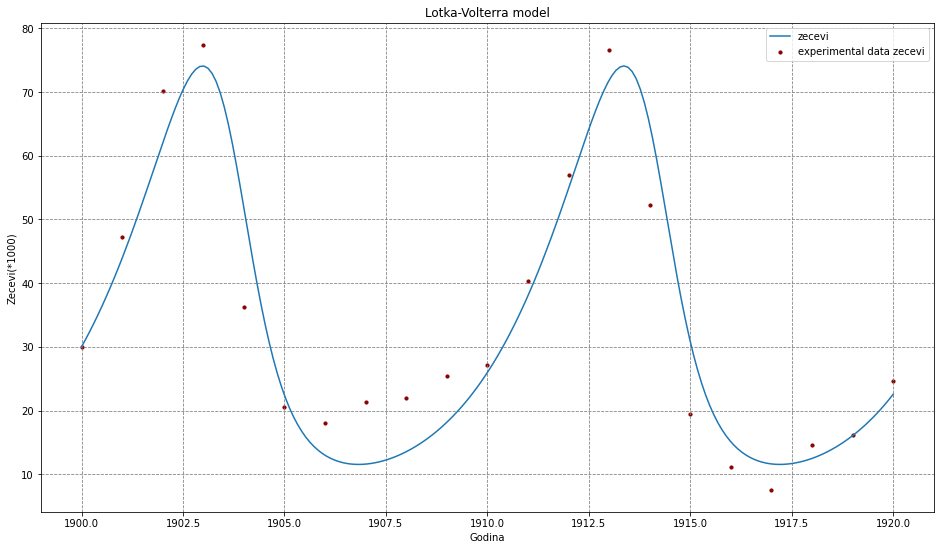

In [8]:
def diff_system(pocetniUslov, vreme, rPrey, a, rPredator, b):
    return [rPrey*pocetniUslov[0] - a*pocetniUslov[0]*pocetniUslov[1], -rPredator*pocetniUslov[1] + b*pocetniUslov[0]*pocetniUslov[1]]

lvm_data = pd.read_csv("lvm_data.csv")
print(lvm_data)
rPrey, a, rPredator, b = 0.4807, 0.02482, 0.9272, 0.02756
pocetniUslov = [lvm_data.Zec[0], lvm_data.Lisica[0]]
vreme = np.linspace(min(lvm_data.Godina), max(lvm_data.Godina), 200)

sol = integrate.odeint(diff_system, pocetniUslov, vreme, args=(rPrey, a, rPredator, b))

lvm_data.plot(kind="scatter", x="Godina", y="Zec", s=10, title="Lotka-Volterra model", figsize=(16, 9), color="DarkRed", label="experimental data zecevi")
plt.plot(vreme, sol[:, 0], label="zecevi")
plt.xlabel("Godina")
plt.ylabel("Zecevi(*1000)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()
plt.show()

Nacrtati grafik na kome treba prikazati eksperimentalne podatke za lisice (scatter plot, DarkRed tačke veličine 10) i krivu dinamike lisica koja se dobija iz rešavanja Lotka-Volterra sistema (reprodukovati grafik sa slajda br. 11 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu.

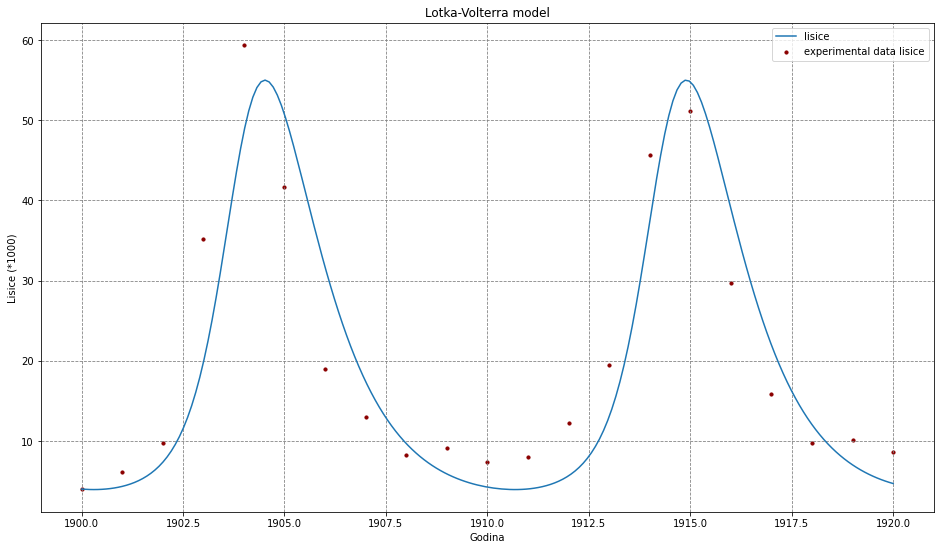

In [70]:
lvm_data.plot(kind="scatter", x="Godina", y="Lisica", s=10, title="Lotka-Volterra model", figsize=(16, 9), color="DarkRed", label="experimental data lisice")
plt.plot(vreme, sol[:, 1], label="lisice")
plt.xlabel("Godina")
plt.ylabel("Lisice (*1000)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()
plt.show()

Nacrtati grafik na kome treba prikazati krive dinamike zečeva i lisica koje se dobijaju iz rešavanja Lotka-Volterra sistema na novoj vremenskoj skali koja je produžena za još 30 godina u odnosu na prethodnu (reprodukovati grafik sa slajda br. 12 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu. 

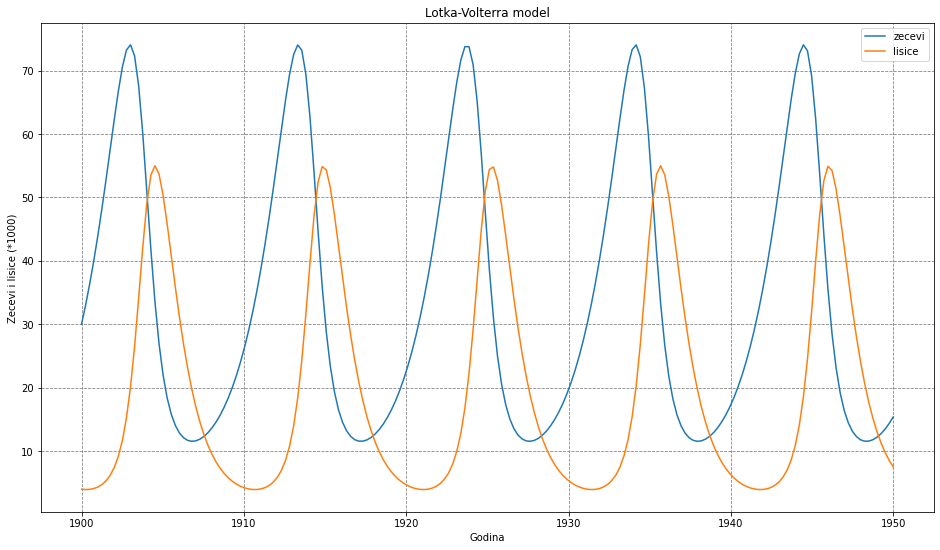

In [71]:
vreme = np.linspace(min(lvm_data.Godina), max(lvm_data.Godina) + 30, 200)

sol = integrate.odeint(diff_system, pocetniUslov, vreme, args=(rPrey, a, rPredator, b))
plt.figure(figsize=(16, 9))
plt.title("Lotka-Volterra model")
plt.plot(vreme, sol[:, 0], label="zecevi")
plt.plot(vreme, sol[:, 1], label="lisice")
plt.xlabel("Godina")
plt.ylabel("Zecevi i lisice (*1000)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()
plt.show()

Proceniti ugaonu frekvenciju oscilovanja lisica, kao i zečeva i proveriti da li se slaže sa formulom datom na slajdu br. 12 iz pripremnog fajla.
--

Period oscilovanja T se računa na sledeći način: <br>
T = 2pi/omega0, gde je omega0 ugaona frekvencija oscilovanja.

Dakle, ako znamo period oscilovanja, ugaonu frekvenciju oscilovanja lako nalazimo: <br>
omega0 = 2pi/T <br>

Sa slike procenjujem da su periodi oscilovanja zečeva i lisica jednaki Tz = Tl = 10 godina. <br>
Dakle, njihova ugaona frekvencija bi bila: <br>
<b>omega0 = 2pi/Tz ~ 0.628 rad/godina.</b>

Ako bih umesto posmatranjem grafika pokušao da im nađem ugaonu frekvenciju preko formule: <br>
<b>omega0 = sqrt(rPredator * rPrey) = sqrt(0.9272*0.4807) ~ 0.67 rad/godina.</b>

Kao što vidimo, dobiju se slični rezultati. <br>
Naravno, razlikuju se jer sam odokativno odredio period oscilovanja i sa njim izračunao ugaonu frekvenciju oscilovanja.

Nacrtati fazni dijagram koji odgovara prethodnom vremenskom dijagramu (reprodukovati grafik sa slajda br. 13 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu. Uneti verikalnu i horizonatlnu isprekidanu liniju crvene boje, tako da se u preseku definiše stacionarno stanje ovakvih oscilacija. 

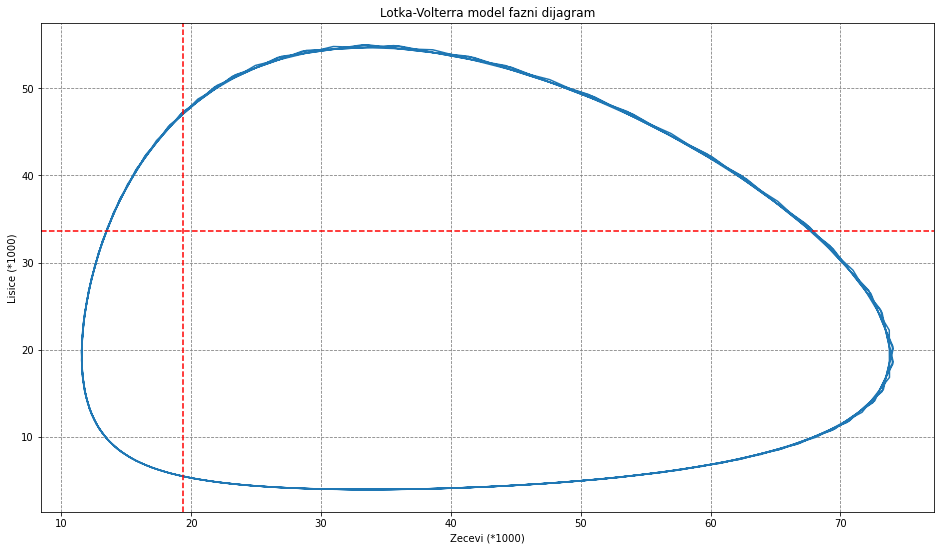

In [72]:
plt.figure(figsize=(16, 9))
plt.title("Lotka-Volterra model fazni dijagram")
plt.plot(sol[:, 0], sol[:, 1])
plt.xlabel("Zecevi (*1000)")
plt.ylabel("Lisice (*1000)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.axvline(rPrey/a, linestyle="--", color="red")
plt.axhline(rPredator/b, linestyle="--", color="red")
plt.show()

Kog oblika je fazni dijagram i zašto?
--

Fazni dijagram je u obliku nepravilne elipse zato što smo u diferencijalnoj jednačini smatrali da populacija plena eksponencijalno raste u odsustvu predatora, dok populacija predatora eksponencijalno opada u odsustvu plena. Zbog toga, populacija lisica i zečeva osciluje oko stacionarnog stanja (koje je samim tim i ravnotežno) koje se nalazi u preseku crvenih isprekidanih linija - to je tačka (x, y) = (rPredator/b, rPrey/a). Očigledno da se populacija nikada neće smiriti u stacionarnom stanju već će po ovom modelu zauvek oscilovati oko njega. <br>
Tačka stacionarnog stanja se dobija iz sistema diferencijalnih jednačina: <br>
<b>dx/dt = rPrey * x - a * x * y </b> <br>
<b>dy/dt = -rPredator * y + b * y * x </b> <br>
U obe jednačine se postavi redom dx/dt = 0 i dy/dt = 0 jer je to po definiciji stacionarno stanje - tako se dobija tačka u preseku crvenih linija.

Ovakav model očigledno nema preterano mnogo veze sa realnošću jer nije uzeta u obzir npr. činjenica ograničenih resursa i interne borbe za opstanak unutar populacije plena.

b)	Simulirati Lotka-Volterra model sa logističkim rastom za $prey$ vrstu:

<br>$\frac{dx}{dt} = r_{prey}x(1-\frac{x}{K}) - axy$<br>
<br>$\frac{dy}{dt} = -r_{predator}y + \epsilon bxy$

U Python skripti (<font color='blue'>lv_logistic_model.py</font>) reprodukovati grafike sa slajda br. 15. iz pripremnog fajla. Za početne uslove koji odgovaraju početnim uslovima iz prethodnog zadatka, za parametre koji odgovaraju parametrima iz prethodnog zadatka (uz dodatak $K = 250$, $\epsilon = 0.9$), na vremenskoj skali od 1900. do 2100. godine u 1000 ekvidistantnih tačaka, rešavati sistem diferencijalnih jednačina. 

Nacrtati vremenski dijagram lisica i zečeva na kome treba označiti ose grafika, postaviti grid i uneti legendu.

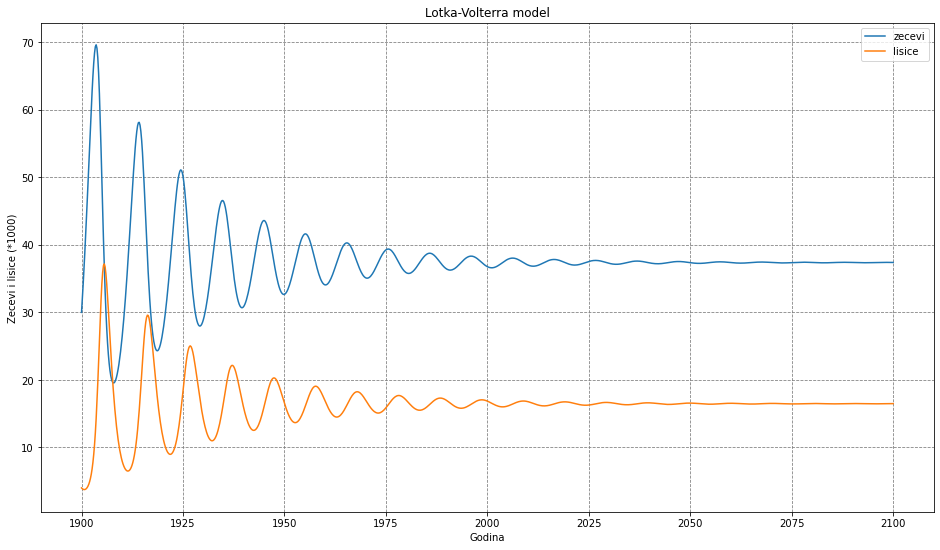

In [80]:
def diff_system(pocetniUslov, vreme, rPrey, a, rPredator, b, K, e):
    return [rPrey*pocetniUslov[0]*(1 - pocetniUslov[0]/K) - a*pocetniUslov[0]*pocetniUslov[1], -rPredator*pocetniUslov[1] + e*b*pocetniUslov[0]*pocetniUslov[1]]

K, e = 250, 0.9
vreme = np.linspace(1900, 2100, 1000)
pocetniUslov = [lvm_data.Zec[0], lvm_data.Lisica[0]]

sol = integrate.odeint(diff_system, pocetniUslov, vreme, args=(rPrey, a, rPredator, b, K, e))

plt.figure(figsize=(16, 9))
plt.title("Lotka-Volterra model")
plt.plot(vreme, sol[:, 0], label="zecevi")
plt.plot(vreme, sol[:, 1], label="lisice")
plt.xlabel("Godina")
plt.ylabel("Zecevi i lisice (*1000)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()
plt.show()

Nacrtati fazni dijagram dinamike lisica i zečeva, na kome treba označiti ose grafika i postaviti grid.

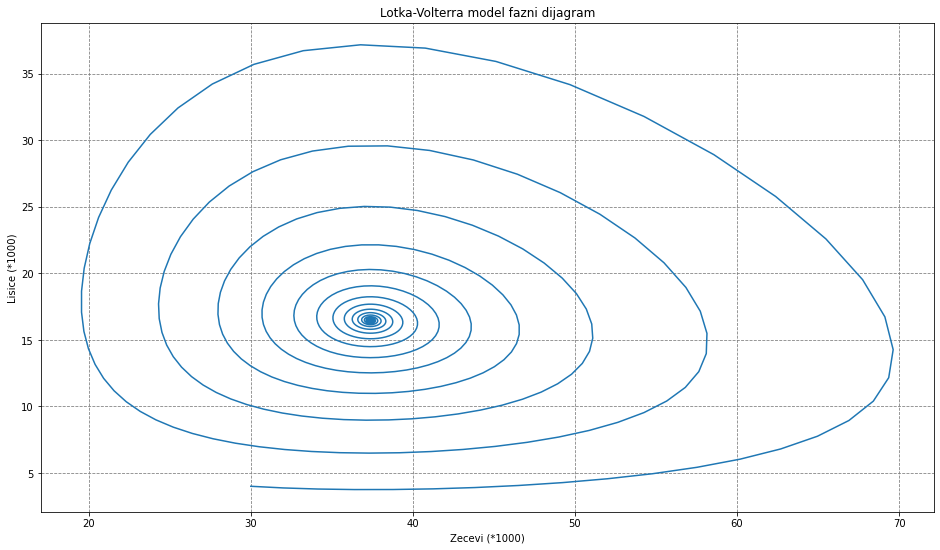

In [84]:
plt.figure(figsize=(16, 9))
plt.title("Lotka-Volterra model fazni dijagram")
plt.plot(sol[:, 0], sol[:, 1])
plt.xlabel("Zecevi (*1000)")
plt.ylabel("Lisice (*1000)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.show()

Kog oblika je fazni dijagram i zašto?
--

Sada nam sistem diferencijalnih jednačina izgleda ovako: <br>
<b>dx/dt = rPrey * x * (1 - x/K) - a * x * y <br>
dy/dt = -rPredator * y + e * b * x * y </b><br>
K --> maksimalni broj populacije plena,  e --> efikasnost kojom predator jede plen

Fazni dijagram je oblika kao kod slabo prigušenih oscilacija zato što smo sada smatrali da populacija plena raste logistički u odsustvu predatora. Zahvaljujući parametru K vremenom će se amplitude oscilovanja oba grafika (koji predstavljaju populacije lisica i zečeva kroz vreme) smanjivati sve dok se u nekom trenutku populacija ne smire u stacionarnom stanju koje bi trebalo da ostane nepromenjeno ravnotežno stanje.

Ranije smo smatrali da populacija plena raste eksponencijalno u odsustvu predatora što i nije baš realna situacija jer postoji uvek ograničenje resursa i interna borba za opstanak unutar populacije plena. Zato je logističi rast mnogo bolja predstava realnosti. 